<a href="https://colab.research.google.com/github/Mibobo-o/Tatanic_Database_Pandas/blob/main/Tatanic_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Titanic_dataset

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

#업로드할 파일 선택
uploaded = files.upload()

#파일 불러오기
df = pd.read_csv("train.csv")
print(df)



Saving train.csv to train (1).csv
     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                 

In [4]:
# Titanic 데이터셋 로드
df = pd.read_csv('train.csv')


In [5]:
# 데이터 기본 정보 확인
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


## 결측값 처리

In [6]:
#결측값 확인
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


##column 별 통계 계산

In [7]:
#통계 계산
print(df.describe())

# count : 총 개수
# mean : 평균 계산
# std : 표준편차
# min : 최소값
# max : 최대값

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


##성별에 따른 생존율 시각화(Matplolib 연동)


Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


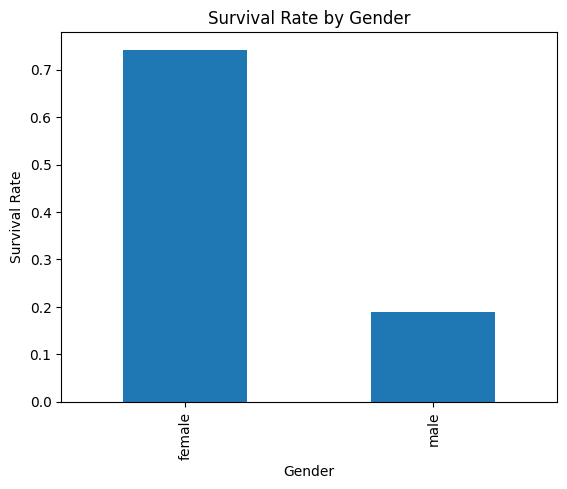

In [9]:
#성별에 따른 생존율 시각화
gender_survival = df.groupby('Sex')['Survived'].mean() #평균 계산 <-사실 ()[]이부분이 이해 안됨;
print(gender_survival)

gender_survival.plot(kind='bar') #bar 형태

plt.title('Survival Rate by Gender') #제목
plt.xlabel('Gender') #x축
plt.ylabel('Survival Rate') #y축
plt.show()

##연령대별 생존율 시각화(Matplotlib 연동)

<ipython-input-17-98e325104a14>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_goup_survival = df.groupby('Age_group')['Survived'].mean()


Age_group
Child       0.579710
Teenager    0.428571
Adult       0.388788
Senior      0.227273
Name: Survived, dtype: float64
-----


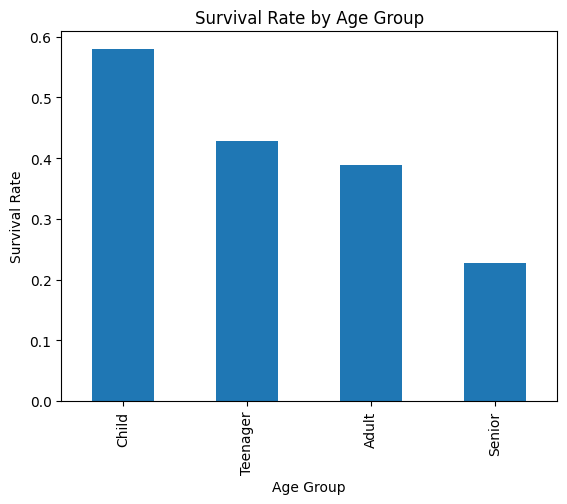

In [17]:
#연령대별 생존율 시각화
df['Age_group'] = pd.cut(df['Age'], bins=[0,12,18,60,100], labels=['Child', 'Teenager','Adult', 'Senior'])
age_goup_survival = df.groupby('Age_group')['Survived'].mean()
print(age_goup_survival)
print('-----')

age_goup_survival.plot(kind='bar')

plt.title('Survival Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.show()